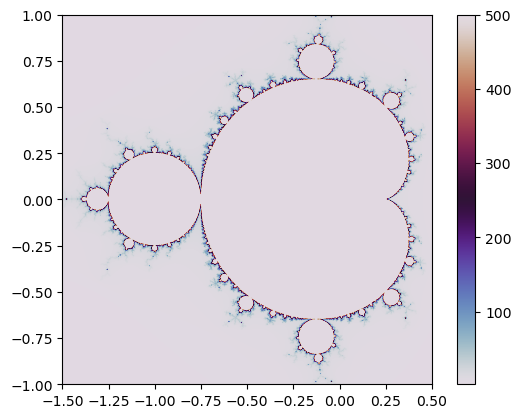

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (r1,r2,np.array([[mandelbrot(complex(r, i),max_iter) for r in r1] for i in r2]))

def plot_mandelbrot(xmin,xmax,ymin,ymax,width,height,max_iter):
    d = mandelbrot_set(xmin,xmax,ymin,ymax,width,height,max_iter)
    plt.imshow(d[2], extent=(xmin, xmax, ymin, ymax), cmap='twilight') # Change 'viridis' to your desired colormap
    plt.colorbar() # Add colorbar to show correspondence between colors and values
    plt.show()

# Define the region of interest and parameters
xmin, xmax = -1.5, 0.5 #-2.0, 2.0
ymin, ymax = -1.0, 1.0 #-1.5, 1.5
width, height = 1000, 1000
max_iter = 500

# Plot the Mandelbrot set
plot_mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter)

#plt.savefig('mandel_zoom2.png')


MovieWriter imagemagick unavailable; using Pillow instead.


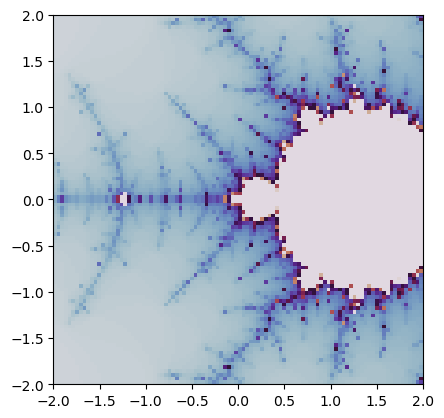

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (r1, r2, np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2]))

def update(frame):
    global xmin, xmax, ymin, ymax, width, height
    # Define the zoom parameters
    zoom_factor = 0.3
    
    # Calculate new boundaries
    delta_x = (xmax - xmin) * (1 - zoom_factor) / 2
    delta_y = (ymax - ymin) * (1 - zoom_factor) / 2
    xmin_new = center_x - delta_x
    xmax_new = center_x + delta_x
    ymin_new = center_y - delta_y
    ymax_new = center_y + delta_y
    
    # Update the plot
    d = mandelbrot_set(xmin_new, xmax_new, ymin_new, ymax_new, width, height, max_iter)
    im.set_data(d[2])
    
    # Adjust the boundaries for the next iteration
    xmin, xmax, ymin, ymax = xmin_new, xmax_new, ymin_new, ymax_new
    
    return im,

# Define the initial region of interest and parameters
xmin, xmax = -2.0, 2.0
ymin, ymax = -2.0, 2.0
width, height = 100, 100
max_iter = 500

# Define the point to zoom in on
center_x = -1.4
center_y = 0

# Create a figure and plot the initial Mandelbrot set
fig, ax = plt.subplots()
d = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
im = ax.imshow(d[2], extent=(xmin, xmax, ymin, ymax), cmap='twilight')

# Create animation
ani = FuncAnimation(fig, update, frames=10, interval=200)

# Save the animation as a GIF
ani.save('mandelbrot_zoom.gif', writer='imagemagick', fps=2)


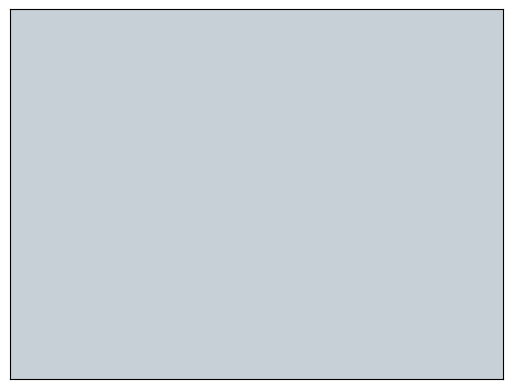

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2])

# Define parameters
xmin, xmax = -2.0, 2.0
ymin, ymax = -1.5, 1.5
width, height = 500, 500
max_iter = 500

# Define zoom levels
zoom_levels = [(xmin, xmax, ymin, ymax)]

# Define specific zoom focus
zoom_focus = (-0.73, -0.25)

# Generate frames for zooming in
for i in range(1, 6):
    zoom_factor = 2**i
    xcenter, ycenter = zoom_focus
    xmin = xcenter - (xcenter - xmin) / zoom_factor
    xmax = xcenter + (xmax - xcenter) / zoom_factor
    ymin = ycenter - (ycenter - ymin) / zoom_factor
    ymax = ycenter + (ymax - ycenter) / zoom_factor
    zoom_levels.append((xmin, xmax, ymin, ymax))

# Generate frames for each zoom level
frames = []
for xmin, xmax, ymin, ymax in zoom_levels:
    mandelbrot_img = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
    frames.append(mandelbrot_img)

# Plot the frames
fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
im = ax.imshow(frames[0], extent=(xmin, xmax, ymin, ymax), cmap='twilight')

# Update function for animation
def update(frame):
    im.set_array(frame)
    return im,

# Create animation
ani = FuncAnimation(fig, update, frames=frames, blit=True)

# Save animation as GIF
writer = PillowWriter(fps=2)
ani.save("mandelbrot_zoom.gif", writer=writer)

plt.show()


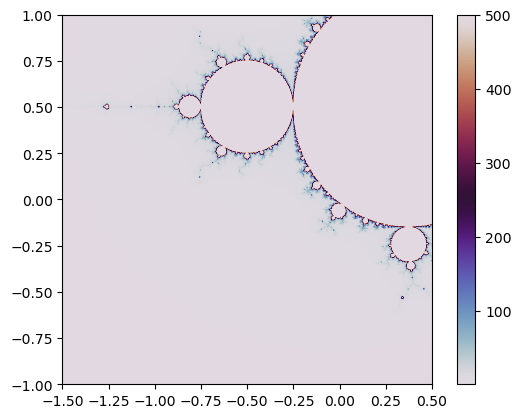

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (r1,r2,np.array([[mandelbrot(complex(r, i),max_iter) for r in r1] for i in r2]))

def mandelbrot_set_with_c(xmin,xmax,ymin,ymax,width,height,max_iter,c):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (r1, r2, np.array([[mandelbrot(complex(r, i) + c, max_iter) for r in r1] for i in r2]))

def plot_mandelbrot(xmin,xmax,ymin,ymax,width,height,max_iter,c=None):
    if c is None:
        d = mandelbrot_set(xmin,xmax,ymin,ymax,width,height,max_iter)
    else:
        d = mandelbrot_set_with_c(xmin,xmax,ymin,ymax,width,height,max_iter,c)
    plt.imshow(d[2], extent=(xmin, xmax, ymin, ymax), cmap='twilight') # Change 'twilight' to your desired colormap
    plt.colorbar() # Add colorbar to show correspondence between colors and values
    plt.show()

# Define the region of interest and parameters
xmin, xmax = -1.5, 0.5
ymin, ymax = -1.0, 1.0
width, height = 1000, 1000
max_iter = 500

# Define the new value of c
c_new = complex(-0.5, 0.5)

# Plot the Mandelbrot set for the new value of c
plot_mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter, c_new)
